# Seaborn

Statistical plotting library

In [3]:
import seaborn as sns
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips') #loads the installed tips dataset

In [5]:
tips.head() #tips is a dataframe :D

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 6.8 KB


## Distribution plot 
Plot a univariate distribution of observations

TypeError: cannot perform reduce with flexible type

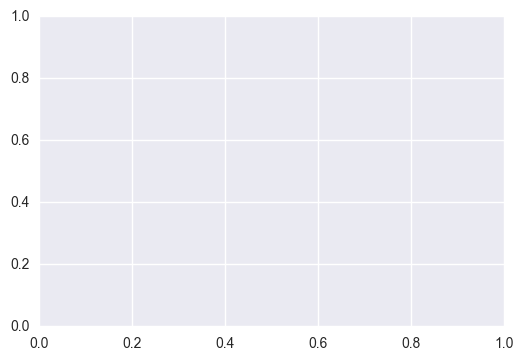

In [9]:
sns.distplot(['tip'])